In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import svd

#### Import data using pandas

In [6]:
# read data using pandas and conver to np array
x_train = pd.read_csv('X_train.csv').values
y_train = pd.read_csv('y_train.csv').values
x_test = pd.read_csv('X_test.csv').values
y_test = pd.read_csv('y_test.csv').values

np.mean(x_train, axis = 0)


array([-0.02469221, -0.03361028, -0.02961023, -0.0176189 ,  0.03227742,
        0.02187786,  1.        ])

#### data processing
From piazza, one TA said no need to normalize data, but why?
Since question (d) already mentioned to normalize data when expanding to p-th regression, I add extra steps on problem (a), (c) to check the difference before and after normalizing data.

In [3]:
mod_x_train = (x_train[:,0:6] - np.mean(x_train[:,0:6], axis = 0)) /np.sqrt(np.var(x_train[:,0:6], axis = 0))
mod_x_train = np.hstack( (mod_x_train, x_train[:,6:7]) )
mod_y_train = y_train - np.mean(y_train)
mod_x_test = (x_test[:,0:6] - np.mean(x_test[:,0:6], axis = 0)) /np.sqrt(np.var(x_test[:,0:6], axis = 0))
mod_x_test = np.hstack((mod_x_test, x_test[:,6:7]))
mod_y_test = y_test - np.mean(y_test)

#### SVD decomposition and Ridge Regression solver

In [4]:
# SVD decomposition
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html
u, s, vh = svd(x_train, full_matrices=False)
u_, s_, vh_ = svd(mod_x_train, full_matrices=False)

In [5]:
def w_solver(u, s, vh, y, lambd):
    # solve w_rr using formula w_RR = V * S_lambda^-1 * U.T * y
    return  np.sum(s**2/(s**2+lambd)), vh.T.dot(np.diag(s/(s**2+lambd))).dot(u.T).dot(y)[:,0]

### Problem 3 (a)
#### generate plot

In [6]:
w = np.zeros([5001,8])
w_ = np.zeros([5001,8])
for lambd in range(0,5001):
    w[lambd,0], w[lambd,1:] = w_solver(u,s,vh,y_train,lambd)
    w_[lambd,0], w_[lambd,1:] = w_solver(u_,s_,vh_,mod_y_train,lambd)

In [7]:
w_df = pd.DataFrame(w)
w_df.columns = ['df','cylinders','displacement','horsepower','weight','acceleration','year made','intercept']

w_df_ = pd.DataFrame(w_)
w_df_.columns = ['df','cylinders','displacement','horsepower','weight','acceleration','year made','intercept']

In [8]:
ax = w_df.plot(x='df', figsize= (8,6))
_ = ax.set_xlabel('df(lambda)')
_ = ax.set_ylabel('Ridge Regression Coefficient W')
_ = ax.set_title('Problem 3 (a)')

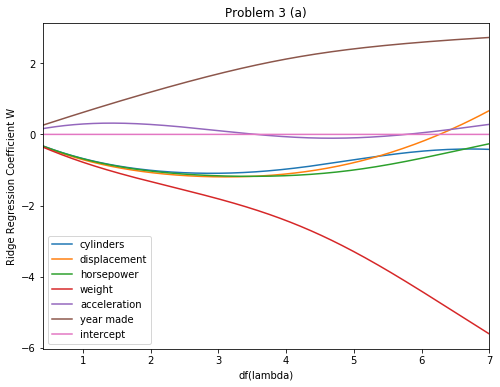

In [9]:
ax = w_df_.plot(x='df', figsize= (8,6))
_ = ax.set_xlabel('df(lambda)')
_ = ax.set_ylabel('Ridge Regression Coefficient W')
_ = ax.set_title('Problem 3 (a)')

#### RMSE

In [10]:
def rmse(y,y_h):
    return np.sqrt( np.sum((y-y_h)**2)/len(y) )

### Problem 3 (c)
#### generate plot

In [11]:
result = np.zeros([51,2])
result_ = np.zeros([51,2])
for lambd in range(0,51):
    _, w_RR = w_solver(u,s,vh,y_train,lambd)
    _, w_RR_ = w_solver(u_,s_,vh_,mod_y_train,lambd)
    y_h = x_test.dot(w_RR)
    y_h_ = mod_x_test.dot(w_RR_)
    result[lambd,0], result[lambd,1] = lambd, rmse(y_test,y_h)
    result_[lambd,0], result_[lambd,1] = lambd, rmse(mod_y_test,y_h_)

In [12]:
rmse_df = pd.DataFrame(result)
rmse_df.columns = ['lambda','RMSE']

rmse_df_ = pd.DataFrame(result_)
rmse_df_.columns = ['lambda','RMSE']

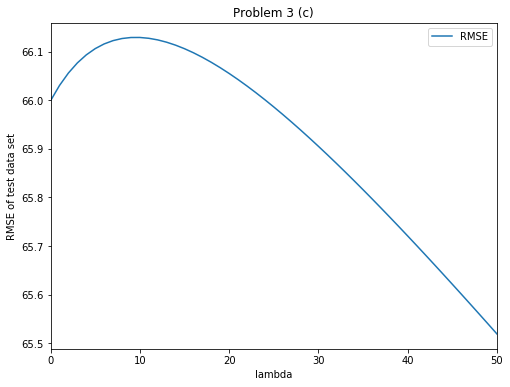

In [13]:
ax = rmse_df.plot(x='lambda', figsize= (8,6))
_ = ax.set_xlabel('lambda')
_ = ax.set_ylabel('RMSE of test data set')
_ = ax.set_title('Problem 3 (c)')

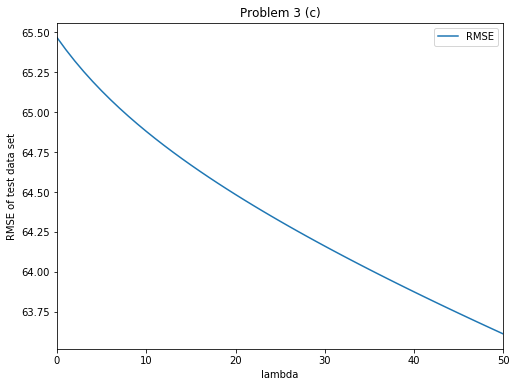

In [14]:
ax = rmse_df_.plot(x='lambda', figsize= (8,6))
_ = ax.set_xlabel('lambda')
_ = ax.set_ylabel('RMSE of test data set')
_ = ax.set_title('Problem 3 (c)')

### Problem 3 (d)

#### data processing

In [15]:
def p_th_transform(x, p=1):
    temp = temp = x[:,0:6]**p
    return (temp-np.mean(temp,axis = 0)) /np.sqrt(np.var(temp,axis = 0))

In [16]:
# transform and normalize X
p1_x_train = np.hstack((p_th_transform(x_train,1), x_train[:,6:7]))
p2_x_train = np.hstack((p_th_transform(x_train,2), x_train))
p3_x_train = np.hstack((p_th_transform(x_train,3), p2_x_train))
p1_x_test = np.hstack((p_th_transform(x_test,1), x_test[:,6:7]))
p2_x_test = np.hstack((p_th_transform(x_test,2), x_test))
p3_x_test = np.hstack((p_th_transform(x_test,3), p2_x_test))
# normalize Y
p_y_train = y_train - np.mean(y_train)
p_y_test = y_test - np.mean(y_test)
# SVD
u1, s1, vh1 = svd(p1_x_train, full_matrices=False)
u2, s2, vh2 = svd(p2_x_train, full_matrices=False)
u3, s3, vh3 = svd(p3_x_train, full_matrices=False)

#### generate plot

In [17]:
result = np.zeros([101,4])
for lambd in range(0,101):
    _, w_RR1 = w_solver(u1,s1,vh1,p_y_train,lambd)
    _, w_RR2 = w_solver(u2,s2,vh2,p_y_train,lambd)
    _, w_RR3 = w_solver(u3,s3,vh3,p_y_train,lambd)
    y_h, y_h2, y_h3 = p1_x_test.dot(w_RR1), p2_x_test.dot(w_RR2), p3_x_test.dot(w_RR3)
    result[lambd,0] = lambd
    result[lambd,1], result[lambd,2], result[lambd,3] = rmse(p_y_test,y_h), rmse(p_y_test,y_h2), rmse(p_y_test,y_h3)

In [18]:
rmse_df = pd.DataFrame(result)
rmse_df.columns = ['lambda','RMSE (p=1)', 'RMSE (p=2)', 'RMSE (p=3)']

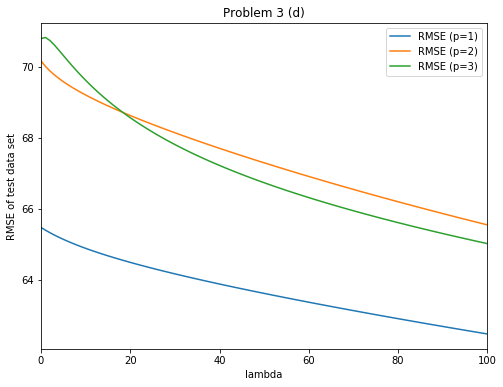

In [19]:
ax = rmse_df.plot(x='lambda', figsize= (8,6))
_ = ax.set_xlabel('lambda')
_ = ax.set_ylabel('RMSE of test data set')
_ = ax.set_title('Problem 3 (d)')